In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
def plot_fun(f, a, b, label="", color="r", step=0.01, ax=plt, title="Wykres funkcji"):
    n = int((b-a)/step)+1
    x = np.linspace(a,b,n)
    ax.plot(x, [f(xi) for xi in x], color=color, label=label)
    if label:
        ax.legend(loc="best")

    if ax is plt:
        ax.title(title)
        ax.xlabel("x")
        ax.ylabel("y")
    else:
        ax.set_title(title)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    ax.grid()

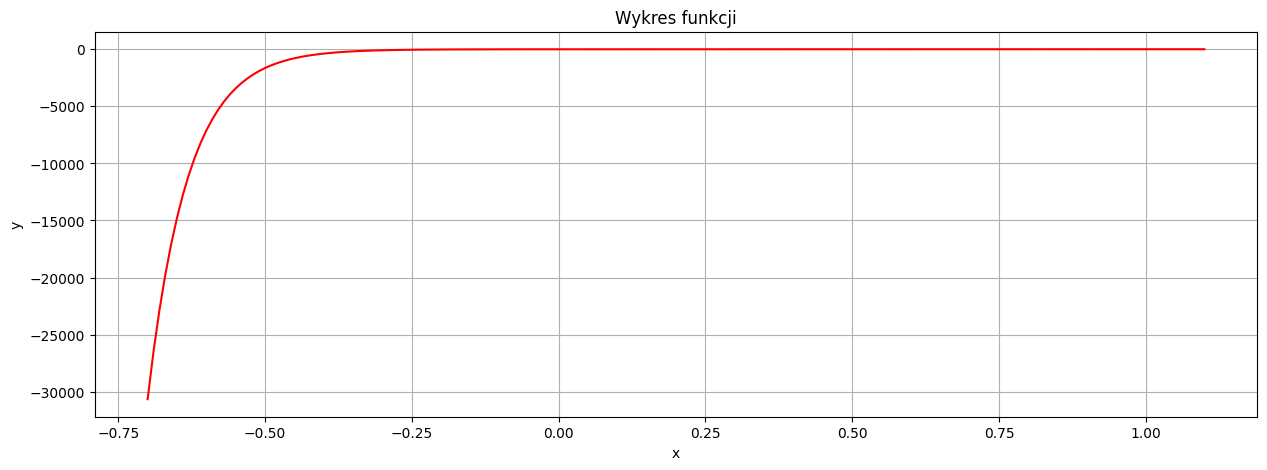

In [4]:
f = lambda x, m, n: (x-1)*math.e**(-m*x)+x**n

g = lambda x: f(x, 14, 12)

a = -0.7
b = 1.1

plt.figure(figsize=(15,5))
plot_fun(g, a, b) 
plt.show()

In [5]:
stop_criter_dist = lambda rho: lambda _, xi, x: abs(x - xi) < rho
stop_criter_fun = lambda rho: lambda f, _, x: abs(f(x)) < rho

f_der = lambda x, m, n: math.e**(-m * x) * (1 - m * x + m) + n * x**(n - 1)
g_der = lambda x: f_der(x, 14, 12)

In [6]:
def sigma_fun(f, f_der):
    return lambda x: x - f(x)/f_der(x)

In [7]:
def newton_raphson(f, f_der, x0, criterium):
    x_prev = float('inf')
    x_curr = x0
    sigma = sigma_fun(f, f_der)
    
    iterations = 0
    while not criterium(f, x_prev, x_curr):
        x_curr, x_prev = sigma(x_curr), x_curr
        iterations += 1
    
    return x_curr, iterations

In [8]:
solution = 0.515749

In [9]:
def calculate_newton(a, b, criterium, rhos, step=0.1):
    n = int(abs(b-a) / step+0.5)
    x0s = [round(a+step*i, 5) for i in range(n)] + [b]
    criteriums = list(map(criterium, rhos))
    df = pd.DataFrame(columns=rhos, index=x0s)

    for i, x0 in enumerate(x0s):
        for j, rho in enumerate(rhos):
            df.iloc[i, j] = newton_raphson(g, g_der, x0, criteriums[j])

    return df

In [10]:
rhos = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-10, 1e-15]
cnd = calculate_newton(a,b, stop_criter_dist, rhos)
cnf = calculate_newton(a,b, stop_criter_fun, rhos)

In [11]:
def calc_xi(f, x0, x1):
    return x1-(x1-x0)/(f(x1)-f(x0))*f(x1)

def secants(f, x0, x1, criterium):
    xi1 = x0
    xi2 = x1
    iterations = 0

    while not criterium(f, xi1, xi2):
        xi2, xi1= calc_xi(f, xi2, xi1), xi2
        iterations += 1

    return xi2, iterations

In [12]:
rho = 1e-10
secants(g, a, b, stop_criter_dist(rho))

(0.5157485647287522, 19)

In [13]:
def calculate_secant(a, b, x1, criterium, rhos, step=0.1):
    if not a <= x1 <= b:
        return
    if x1-a < b-x1:
        a = x1
    else:
        b = x1
    
    n = int(abs(b-a)/step+0.5)
    if a == x1:
        x0s = [a+step*i for i in range(1,n)] + [b]
    else:
        x0s = [a+step*i for i in range(n)]

    criteriums = list(map(criterium, rhos))

    df = pd.DataFrame(columns=rhos, index=[(round(min(x0, x1), 5), round(max(x0, x1), 5)) for x0 in x0s]) 
    for i, x0 in enumerate(x0s):
        for j in range(len(rhos)):
            df.iloc[i, j] = secants(g, x0, x1, criteriums[j])
    
    return df

In [14]:
csd1 = calculate_secant(a, b, a, stop_criter_dist, rhos)
csf1 = calculate_secant(a, b, a, stop_criter_fun, rhos)

In [15]:
csd2 = calculate_secant(a, b, b, stop_criter_dist, rhos)
csf2 = calculate_secant(a, b, b, stop_criter_fun, rhos)

In [17]:
csf1.applymap(lambda cell: round(cell[0],4))

/var/folders/7w/xv3k68j12xg711gh35rpkxw40000gn/T/ipykernel_8421/3768707628.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  csf1.applymap(lambda cell: round(cell[0],4))


,1.000000e-02,1.000000e-03,1.000000e-04,1.000000e-05,1.000000e-07,1.000000e-10,1.000000e-15
"(-0.7, -0.6)",0.3425,0.4732,0.5159,0.5159,0.5157,0.5157,0.5157
"(-0.7, -0.5)",0.3216,0.4543,0.5138,0.5158,0.5157,0.5157,0.5157
"(-0.7, -0.4)",0.3158,0.4488,0.5125,0.5159,0.5157,0.5157,0.5157
"(-0.7, -0.3)",0.3174,0.4503,0.5129,0.5159,0.5157,0.5157,0.5157
"(-0.7, -0.2)",0.3221,0.4547,0.5139,0.5158,0.5157,0.5157,0.5157
"(-0.7, -0.1)",0.3281,0.4603,0.5149,0.5158,0.5157,0.5157,0.5157
"(-0.7, 0.0)",0.3349,0.4664,0.5155,0.5155,0.5157,0.5157,0.5157
"(-0.7, 0.1)",0.3425,0.4731,0.5159,0.5159,0.5157,0.5157,0.5157
"(-0.7, 0.2)",0.3035,0.4801,0.5092,0.5159,0.5157,0.5157,0.5157
"(-0.7, 0.3)",0.3648,0.4486,0.5123,0.5159,0.5157,0.5157,0.5157


In [18]:
csf2.applymap(lambda cell: cell[1])

/var/folders/7w/xv3k68j12xg711gh35rpkxw40000gn/T/ipykernel_8421/3454678016.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  csf2.applymap(lambda cell: cell[1])


,1.000000e-02,1.000000e-03,1.000000e-04,1.000000e-05,1.000000e-07,1.000000e-10,1.000000e-15
"(-0.7, 1.1)",9,12,14,15,16,17,18
"(-0.6, 1.1)",9,12,14,15,16,17,18
"(-0.5, 1.1)",9,12,14,15,16,17,18
"(-0.4, 1.1)",9,12,14,15,16,17,18
"(-0.3, 1.1)",9,12,14,15,16,17,18
"(-0.2, 1.1)",7,10,12,13,14,15,16
"(-0.1, 1.1)",1,3,5,6,7,8,10
"(0.0, 1.1)",3,6,8,9,10,11,12
"(0.1, 1.1)",5,8,10,10,12,13,14
"(0.2, 1.1)",4,7,9,10,11,12,13
